In [57]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn
matplotlib.style.use('seaborn')
import torch as T
from agent_code.dqn_agent.dqn_model import DQN, Buffer

%matplotlib inline

In [58]:
def latest(d):
    def steps(name):
        return int(name.split('step-')[-1].split('_aint')[0])
    def date(name):
        return datetime.datetime.fromisoformat(name.split('_')[0][6:])
    for f in os.listdir(d):
        if os.path.isfile(d+f):
            print(f)
            print(date(f))
            print(steps(f))
    flist = np.array([[f, date(f), steps(f)] for f in os.listdir(d) if os.path.isfile(d+f)])
    print(flist)
    print(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])
    return flist[np.argmax(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])][0]

In [100]:
last = True
directory = '/home/phaetjay/models/'

name = 'coins/' + 'model-2019-03-22 02:14:13/' + '/model-2019-03-22 02:14:13_step-1000000_aint-2000_lint-8' + '.pth'
#name = latest(directory) if last else name

In [101]:
print('Model name:', name)
aint = int(name.split('_aint-')[1].split('_lint')[0])
lint = int(name.split('_lint-')[1].split('.pth')[0])
data = T.load(directory + name, map_location='cpu')['analysis']
print(f'Analysis interval: {aint}, learning interval: {lint}')
data = np.array(data)
steps = np.array([step['learningstep'] for step in data]) * lint
maxstep = np.max(steps)
print(f'There are {len(data)} data points from {maxstep} training steps.')
print(f'This corresponds to {maxstep} training steps.')
print('\nExcerpt of the data:\n',data[1])

Model name: coins/model-2019-03-22 02:14:13//model-2019-03-22 02:14:13_step-1000000_aint-2000_lint-8.pth
Analysis interval: 2000, learning interval: 8
There are 500 data points from 999608 training steps.
This corresponds to 999608 training steps.

Excerpt of the data:
 {'reward': 0.11860000000000002, 'explored': 0.0985, 'loss': 0.1164606, 'action': 1.5515, 'learningstep': 451, 'q': 1.4653833, 'epsilon': 0.10000000000000002}


In [102]:
action = [step['action'] for step in data]
reward = [step['reward'] for step in data]
epsilon = [step['epsilon'] for step in data]
explored = [step['explored'] for step in data]
loss = [step['loss'] for step in data]
q = [step['q'] for step in data]

### Plot of average action taken in each step

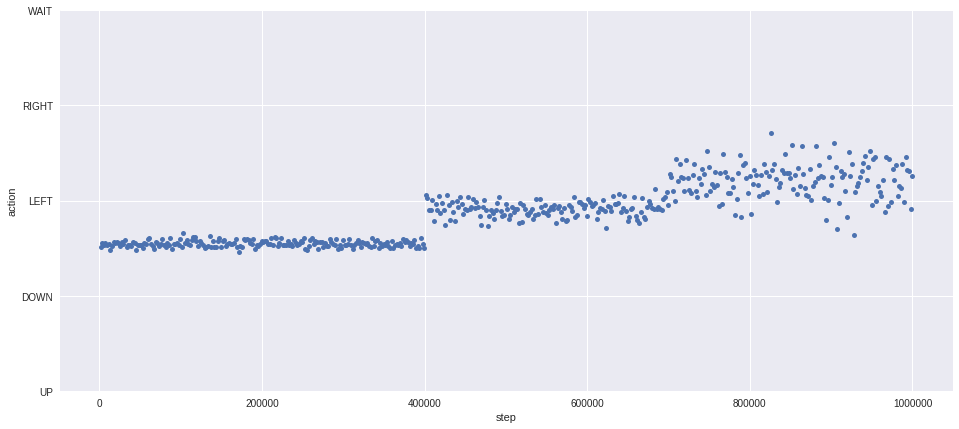

In [103]:
plt.figure(figsize=(16, 7))
plt.yticks((0, 1, 2, 3, 4), ('UP', 'DOWN', 'LEFT', 'RIGHT', 'WAIT'))
plt.ylim(0, 4)
plt.xlabel('step')
plt.ylabel('action')
plt.plot(steps, action, 'o', ms=5, color='C6')
plt.savefig(directory + name + '_action.png', dpi=300)

### Plot of ε-greediness (exploration vs exploitation)

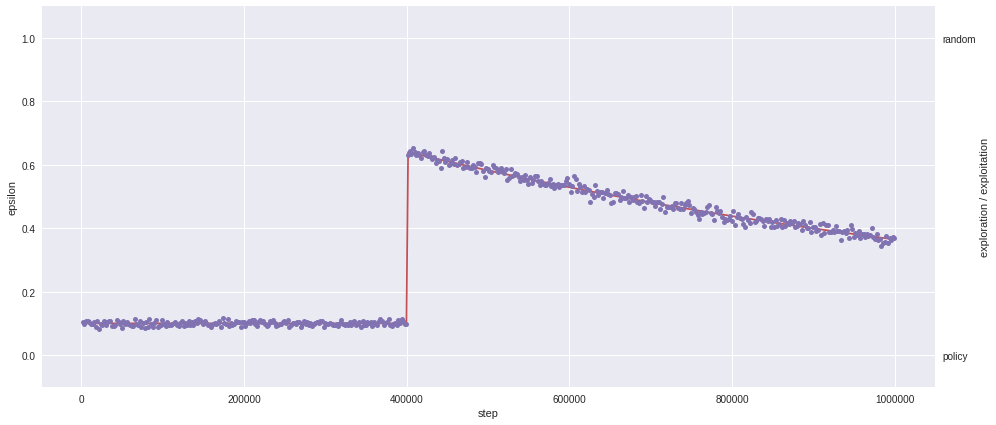

In [104]:
plt.figure(figsize=(16, 7))
plt.xlabel('step')
plt.ylim(-0.1, 1.1)
plt.ylabel('epsilon')
plt.twinx()
plt.ylabel('exploration / exploitation')
plt.yticks([0, 1], ('policy', 'random'))
plt.ylim(-0.1, 1.1)
plt.plot(steps, epsilon, '-', ms=3, color='C8')
plt.plot(steps, explored, 'o', ms='5', color='C9')
plt.savefig(directory + name + '_epsilon.png', dpi=300)

### Plot of reward in each step

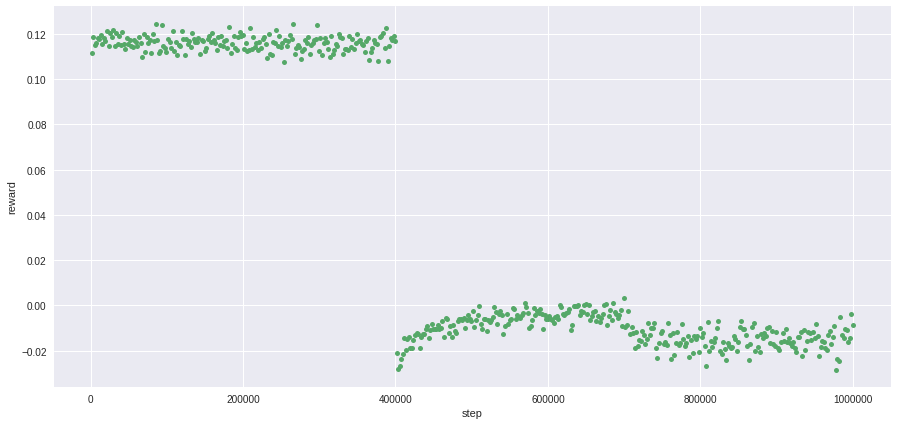

In [105]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('reward')
plt.plot(steps, reward, 'o', ms=5, color='C1')
plt.savefig(directory + name + '_reward.png', dpi=300)

### Plot of Q over training period

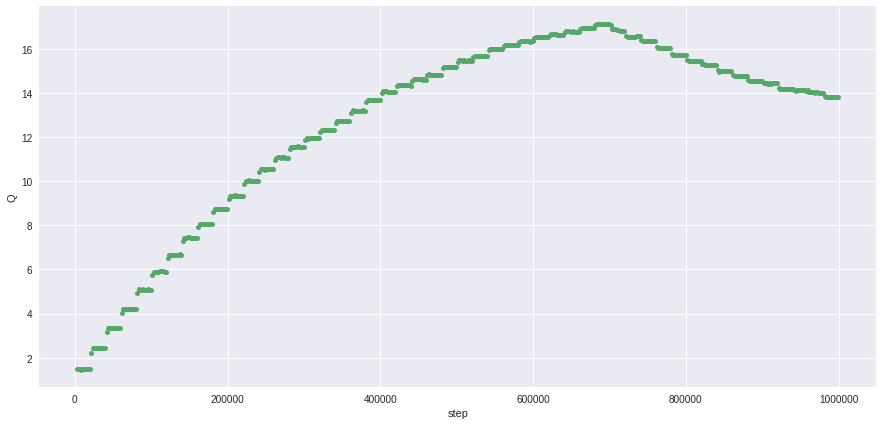

In [106]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('Q')
plt.plot(steps[1:], q[1:], 'o', ms=5, color='C1')
plt.savefig(directory + name + '_q.png', dpi=300)

### Plot of loss over training period

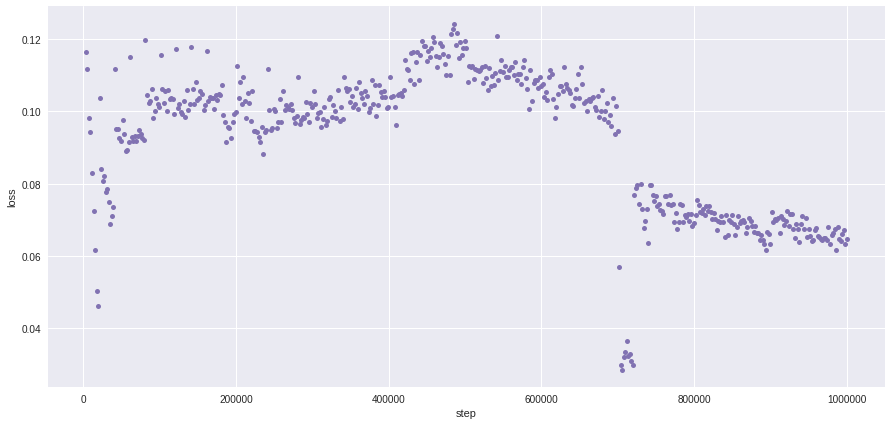

In [107]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(steps[1:], loss[1:], 'o', ms=5, color='C3')
plt.savefig(directory + name + '_loss.png', dpi=300)